In [27]:
from datetime import datetime
import pandas as pd
import numpy as np
import csv
import os
import seaborn as sns
import matplotlib.pyplot as plt
from vzorci_in_pomozne_definicije import *

In [12]:
podatkovna_baza = pd.read_json(FILENAME_POPOLNI_PODATKI_KARTE_JSON)

# Obravnava redkosti in cene

Kot prvo me je zanimalo, kakšna je povezava med redkostjo in ceno kart

<AxesSubplot: >

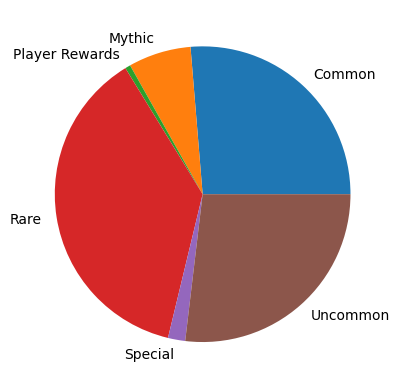

In [13]:
delezi_redkosti = podatkovna_baza.groupby("redkost").size()
delezi_redkosti.plot(kind="pie")

Text(0, 0.5, 'cena (v centih)')

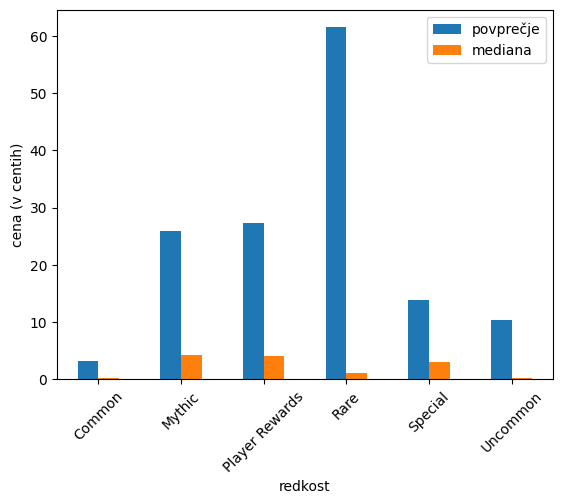

In [82]:
povprecna_cena_glede_na_redkost = podatkovna_baza.groupby("redkost")["povprecna_cena"].mean()
mediana_cena_glede_na_redkost = podatkovna_baza.groupby("redkost")["povprecna_cena"].median()   

df = pd.DataFrame({'povprečje': povprecna_cena_glede_na_redkost,
                   'mediana': mediana_cena_glede_na_redkost}, index=None)
ax = df.plot.bar(rot=45)
ax.set_ylabel("cena (v centih)")

<AxesSubplot: title={'center': 'Razpored kart v cenovne razrede glede na evropske cene (€)'}>

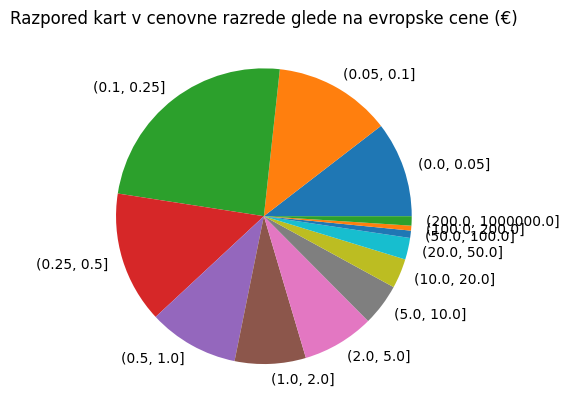

In [94]:
cenovni_razredi_kart = np.array([0, 0.05, 0.10, 0.25, 0.5, 1, 2, 5, 10, 20, 50, 100, 200, 1000000])
podatki_po_ceni_eu = podatkovna_baza.groupby(pd.cut(podatkovna_baza["povprecje_eu"], cenovni_razredi_kart)).size()

#pd.merge(podatki_po_ceni_eu, podatki_po_ceni_us).plot(kind = "bar")
podatki_po_ceni_eu.plot(kind = "pie", title='Razpored kart v cenovne razrede glede na evropske cene (€)')


# Tukaj je treba porihtati, da dobimo primerjavo ameriških cenovnih razredov z evropskimi

<AxesSubplot: title={'center': 'Razpored kart v cenovne razrede glede na ameriške cene ($)'}>

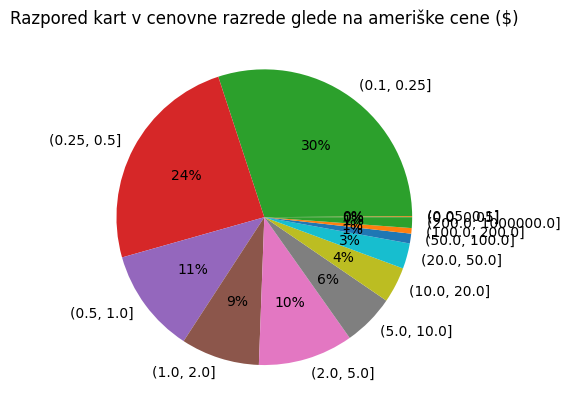

In [103]:
podatki_po_ceni_us = podatkovna_baza.groupby(pd.cut(podatkovna_baza["povprecna_cena"], cenovni_razredi_kart)).size()
podatki_po_ceni_us.plot(kind = "pie", title='Razpored kart v cenovne razrede glede na ameriške cene ($)')

# Analiza različnih tipov kart

Poleg cene in redkosti so me zanimali tudi podatki o raznih tipih [(*type*)](https://mtg.fandom.com/wiki/Card_type) in podtipih [(*subtype*)](https://mtg.fandom.com/wiki/Subtype) kart.

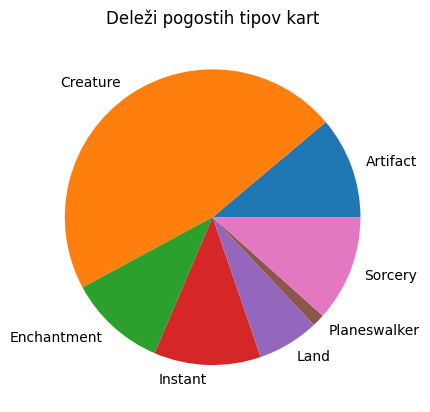

In [83]:
povezovalna_cardtype = pd.read_csv(os.path.join("Podatki", "Povezovalne_tabele", f"povezovalna_cardtype.csv"))
grupa_po_cardtypu = povezovalna_cardtype.groupby("cardtype")
velikost_grupe_po_cardtypu = grupa_po_cardtypu.size()
velikost_grupe_po_cardtypu[velikost_grupe_po_cardtypu > 100].plot.pie(title='Deleži pogostih tipov kart')
dovolj_veliki_kljuci_cardtypov = velikost_grupe_po_cardtypu[velikost_grupe_po_cardtypu > 100].keys()


<AxesSubplot: xlabel='subtype'>

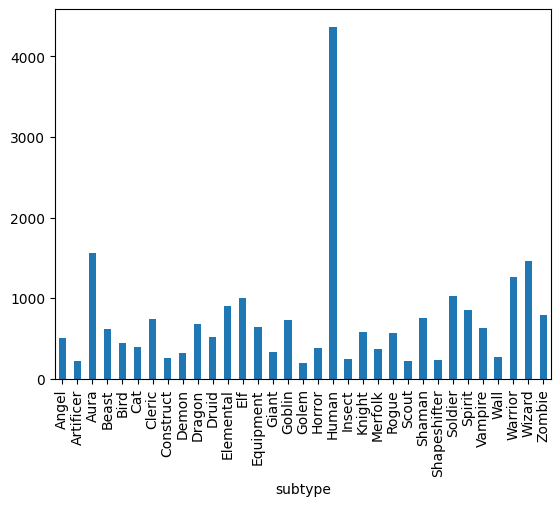

In [17]:
povezovalna_subtype = pd.read_csv(os.path.join("Podatki", "Povezovalne_tabele", "povezovalna_subtype.csv"))
grupa_po_subtypu = povezovalna_subtype.groupby("subtype")
velikost_grupe_po_subtypu = grupa_po_subtypu.size()
velikost_grupe_po_subtypu[velikost_grupe_po_subtypu > 200].plot.bar()
#povprecna_cena_glede_na_cardtype = podaytkovna_baza.groupby("cardtype")["povprecna_cena"].median()

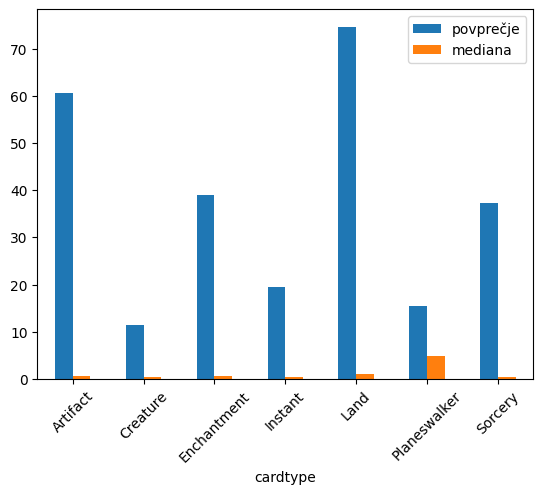

In [76]:
povprecna_cena_cardtypov = podatkovna_baza[["id_karte", "povprecna_cena"]].merge(povezovalna_cardtype)
povprecna_cena = povprecna_cena_cardtypov.groupby("cardtype")["povprecna_cena"].mean()[dovolj_veliki_kljuci_cardtypov]
mediana = povprecna_cena_cardtypov.groupby("cardtype")["povprecna_cena"].median()[dovolj_veliki_kljuci_cardtypov]

df = pd.DataFrame({'povprečje': povprecna_cena,
                   'mediana': mediana}, index=dovolj_veliki_kljuci_cardtypov)
ax = df.plot.bar(rot=45)